In [1]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [2]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22inferior+vena+cava+%28IVC%29+filters%22%5Btiab%5D&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [3]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') 
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22inferior+vena+cava+%28IVC%29+filters%22%5Btiab%5D&filter=years.2015-2023'
# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 29):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                 Title  \
0                          Inferior vena cava filters.   
1    Inferior Vena Cava Filters to Prevent Pulmonar...   
2    Long-term complications of inferior vena cava ...   
3    Inferior Vena Cava Filters: Past, Present, and...   
4    An expert spotlight on inferior vena cava filt...   
..                                                 ...   
268  Our Short-Term Results with Percutaneous Mecha...   
269  Increasing Rate of Pulmonary Embolism in Traum...   
270  Antibiofilm and membrane-damaging potential of...   
271  Residential zip code influences outcomes follo...   
272  Protrieve sheath utilization for capturing sup...   

                                               Authors  \
0                                Duffett L, Carrier M.   
1    Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                               Ayad MT, Gillespie DL.   
3              Marron RM, Rali P, Hountras P, Bull TM.   
4    Pillai A

In [6]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 273


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [8]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [9]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/28019712
https://pubmed.ncbi.nlm.nih.gov/28935036
https://pubmed.ncbi.nlm.nih.gov/30126794
https://pubmed.ncbi.nlm.nih.gov/32795479
https://pubmed.ncbi.nlm.nih.gov/34139952
https://pubmed.ncbi.nlm.nih.gov/30122187
https://pubmed.ncbi.nlm.nih.gov/29872245
https://pubmed.ncbi.nlm.nih.gov/37287823
https://pubmed.ncbi.nlm.nih.gov/37770730
https://pubmed.ncbi.nlm.nih.gov/31361531
https://pubmed.ncbi.nlm.nih.gov/27247476
https://pubmed.ncbi.nlm.nih.gov/26183040
https://pubmed.ncbi.nlm.nih.gov/29331855
https://pubmed.ncbi.nlm.nih.gov/35831010
https://pubmed.ncbi.nlm.nih.gov/31361526
https://pubmed.ncbi.nlm.nih.gov/26746328
https://pubmed.ncbi.nlm.nih.gov/29909860
https://pubmed.ncbi.nlm.nih.gov/27247483
https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32919823
https://pubmed.ncbi.nlm.nih.gov/29804569
https://pubmed.ncbi.nlm.nih.gov/36570113
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.ncbi.nlm.nih.gov/32337618
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/28019712',
 'https://pubmed.ncbi.nlm.nih.gov/28935036',
 'https://pubmed.ncbi.nlm.nih.gov/30126794',
 'https://pubmed.ncbi.nlm.nih.gov/32795479',
 'https://pubmed.ncbi.nlm.nih.gov/34139952',
 'https://pubmed.ncbi.nlm.nih.gov/30122187',
 'https://pubmed.ncbi.nlm.nih.gov/29872245',
 'https://pubmed.ncbi.nlm.nih.gov/37287823',
 'https://pubmed.ncbi.nlm.nih.gov/37770730',
 'https://pubmed.ncbi.nlm.nih.gov/31361531',
 'https://pubmed.ncbi.nlm.nih.gov/27247476',
 'https://pubmed.ncbi.nlm.nih.gov/26183040',
 'https://pubmed.ncbi.nlm.nih.gov/29331855',
 'https://pubmed.ncbi.nlm.nih.gov/35831010',
 'https://pubmed.ncbi.nlm.nih.gov/31361526',
 'https://pubmed.ncbi.nlm.nih.gov/26746328',
 'https://pubmed.ncbi.nlm.nih.gov/29909860',
 'https://pubmed.ncbi.nlm.nih.gov/27247483',
 'https://pubmed.ncbi.nlm.nih.gov/33805207',
 'https://pubmed.ncbi.nlm.nih.gov/32919823',
 'https://pubmed.ncbi.nlm.nih.gov/29804569',
 'https://pubmed.ncbi.nlm.nih.gov/36570113',
 'https://

In [10]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
#print(pmids_list)

In [11]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)

1 Department of Medicine, The Ottawa Hospital Research Institute, University of Ottawa, Ottawa, ON, Canada.
1 Division of Cardiology, Department of Medicine, Columbia University Medical Center/New York-Presbyterian Hospital, New York, New York; Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut. Electronic address: bb2813@cumc.columbia.edu., 2 Temple University Hospital, Philadelphia, Pennsylvania., 3 Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut; Section of Cardiovascular Medicine, Department of Internal Medicine, Yale School of Medicine, New Haven, Connecticut., 4 Division of Cardiology, Department of Medicine, Columbia University Medical Center/New York-Presbyterian Hospital, New York, New York., 5 Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut; Department of Chronic Disease Epidemiology, Yale School of Public Health, New Haven, Connecticut., 6 Depar

In [12]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)

                                                 Title  \
0                          Inferior vena cava filters.   
1    Inferior Vena Cava Filters to Prevent Pulmonar...   
2    Long-term complications of inferior vena cava ...   
3    Inferior Vena Cava Filters: Past, Present, and...   
4    An expert spotlight on inferior vena cava filt...   
..                                                 ...   
268  Our Short-Term Results with Percutaneous Mecha...   
269  Increasing Rate of Pulmonary Embolism in Traum...   
270  Antibiofilm and membrane-damaging potential of...   
271  Residential zip code influences outcomes follo...   
272  Protrieve sheath utilization for capturing sup...   

                                               Authors  \
0                                Duffett L, Carrier M.   
1    Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                               Ayad MT, Gillespie DL.   
3              Marron RM, Rali P, Hountras P, Bull TM.   
4    Pillai A

In [13]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Inferior vena cava filters.,"Duffett L, Carrier M.",J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...,PMID: 28019712,2017,"1 Department of Medicine, The Ottawa Hospital ...",,\n\n\n \n Comprehensive assessment...
1,Inferior Vena Cava Filters to Prevent Pulmonar...,"Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...",J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...,PMID: 28935036,2017,"1 Division of Cardiology, Department of Medici...",,\n\n\n \n Prophylactic Inferior Ve...
2,Long-term complications of inferior vena cava ...,"Ayad MT, Gillespie DL.",J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...,PMID: 30126794,2019,1 Department of Vascular and Endovascular Surg...,,\n\n\n \n Factors predicting failu...
3,"Inferior Vena Cava Filters: Past, Present, and...","Marron RM, Rali P, Hountras P, Bull TM.",Chest. 2020 Dec;158(6):2579-2589. doi: 10.1016...,PMID: 32795479,2020,"1 Department of Thoracic Medicine and Surgery,...",,"\n\n\n \n Indications, application..."
4,An expert spotlight on inferior vena cava filt...,"Pillai A, Kathuria M, Bayona Molano MDP, Sutph...",Expert Rev Hematol. 2021 Jul;14(7):593-605. do...,PMID: 34139952,2021,"1 Department of Radiology, University of Texas...",,\n\n\n \n Retrievable Inferior ven...
...,...,...,...,...,...,...,...,...
268,Our Short-Term Results with Percutaneous Mecha...,"Ozpak B, Ilhan G, Ozcem B, Kara H.",Thorac Cardiovasc Surg. 2016 Jun;64(4):316-22....,PMID: 26090887,2016,"1 Department of Cardiovascular Surgery, Tekird...",,\n\n\n \n Percutaneous manual aspi...
269,Increasing Rate of Pulmonary Embolism in Traum...,"McDuffie JV, Medintz ML, Culhane JT.",Cureus. 2022 Jan 31;14(1):e21793. doi: 10.7759...,PMID: 35251860,2022,"1 Department of Trauma Surgery, Saint Louis Un...",,\n\n\n \n Pulmonary embolism and d...
270,Antibiofilm and membrane-damaging potential of...,"Singh A, Ahmed A, Prasad KN, Khanduja S, Singh...",Antimicrob Agents Chemother. 2015 Nov;59(11):6...,PMID: 26303796,2015,"1 Department of Microbiology, Sanjay Gandhi Po...",,\n\n\n \n Synthesis of cuprous oxi...
271,Residential zip code influences outcomes follo...,"Agarwal S, Menon V, Jaber WA.",Vasc Med. 2015 Oct;20(5):439-46. doi: 10.1177/...,PMID: 26163399,2015,"1 Department of Cardiovascular Medicine, Cleve...",,\n\n\n \n Outcomes after acute isc...


In [14]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                 Title  \
0                          Inferior vena cava filters.   
1    Inferior Vena Cava Filters to Prevent Pulmonar...   
2    Long-term complications of inferior vena cava ...   
3    Inferior Vena Cava Filters: Past, Present, and...   
4    An expert spotlight on inferior vena cava filt...   
..                                                 ...   
268  Our Short-Term Results with Percutaneous Mecha...   
269  Increasing Rate of Pulmonary Embolism in Traum...   
270  Antibiofilm and membrane-damaging potential of...   
271  Residential zip code influences outcomes follo...   
272  Protrieve sheath utilization for capturing sup...   

                                               Authors  \
0                                Duffett L, Carrier M.   
1    Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                               Ayad MT, Gillespie DL.   
3              Marron RM, Rali P, Hountras P, Bull TM.   
4    Pillai A

In [15]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)

                                                 Title  \
0                          Inferior vena cava filters.   
1    Inferior Vena Cava Filters to Prevent Pulmonar...   
2    Long-term complications of inferior vena cava ...   
3    Inferior Vena Cava Filters: Past, Present, and...   
4    An expert spotlight on inferior vena cava filt...   
..                                                 ...   
268  Our Short-Term Results with Percutaneous Mecha...   
269  Increasing Rate of Pulmonary Embolism in Traum...   
270  Antibiofilm and membrane-damaging potential of...   
271  Residential zip code influences outcomes follo...   
272  Protrieve sheath utilization for capturing sup...   

                                               Authors  \
0                                Duffett L, Carrier M.   
1    Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                               Ayad MT, Gillespie DL.   
3              Marron RM, Rali P, Hountras P, Bull TM.   
4    Pillai A

In [16]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Inferior vena cava filters.,"Duffett L, Carrier M.",J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...,PMID: 28019712,2017,"1 Department of Medicine, The Ottawa Hospital ...",Comprehensive assessment of prophylactic preop...
1,Inferior Vena Cava Filters to Prevent Pulmonar...,"Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...",J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...,PMID: 28935036,2017,"1 Division of Cardiology, Department of Medici...",Prophylactic Inferior Vena Cava Filters for Ve...
2,Long-term complications of inferior vena cava ...,"Ayad MT, Gillespie DL.",J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...,PMID: 30126794,2019,1 Department of Vascular and Endovascular Surg...,Factors predicting failure of retrieval of inf...
3,"Inferior Vena Cava Filters: Past, Present, and...","Marron RM, Rali P, Hountras P, Bull TM.",Chest. 2020 Dec;158(6):2579-2589. doi: 10.1016...,PMID: 32795479,2020,"1 Department of Thoracic Medicine and Surgery,...","Indications, applications, and outcomes of inf..."
4,An expert spotlight on inferior vena cava filt...,"Pillai A, Kathuria M, Bayona Molano MDP, Sutph...",Expert Rev Hematol. 2021 Jul;14(7):593-605. do...,PMID: 34139952,2021,"1 Department of Radiology, University of Texas...",Retrievable Inferior vena cava filters in preg...
...,...,...,...,...,...,...,...
268,Our Short-Term Results with Percutaneous Mecha...,"Ozpak B, Ilhan G, Ozcem B, Kara H.",Thorac Cardiovasc Surg. 2016 Jun;64(4):316-22....,PMID: 26090887,2016,"1 Department of Cardiovascular Surgery, Tekird...",Percutaneous manual aspiration thrombectomy fo...
269,Increasing Rate of Pulmonary Embolism in Traum...,"McDuffie JV, Medintz ML, Culhane JT.",Cureus. 2022 Jan 31;14(1):e21793. doi: 10.7759...,PMID: 35251860,2022,"1 Department of Trauma Surgery, Saint Louis Un...",Pulmonary embolism and deep venous thrombosis ...
270,Antibiofilm and membrane-damaging potential of...,"Singh A, Ahmed A, Prasad KN, Khanduja S, Singh...",Antimicrob Agents Chemother. 2015 Nov;59(11):6...,PMID: 26303796,2015,"1 Department of Microbiology, Sanjay Gandhi Po...",Synthesis of cuprous oxide epoxy nanocomposite...
271,Residential zip code influences outcomes follo...,"Agarwal S, Menon V, Jaber WA.",Vasc Med. 2015 Oct;20(5):439-46. doi: 10.1177/...,PMID: 26163399,2015,"1 Department of Cardiovascular Medicine, Cleve...",Outcomes after acute ischemic stroke in the Un...


In [17]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [2]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\New DATASETS\Hemolysis_IVC.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0                        Inferior vena cava filters.   
1  Inferior Vena Cava Filters to Prevent Pulmonar...   
2  Long-term complications of inferior vena cava ...   
3  Inferior Vena Cava Filters: Past, Present, and...   
4  An expert spotlight on inferior vena cava filt...   

                                             Authors  \
0                              Duffett L, Carrier M.   
1  Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                             Ayad MT, Gillespie DL.   
3            Marron RM, Rali P, Hountras P, Bull TM.   
4  Pillai A, Kathuria M, Bayona Molano MDP, Sutph...   

                                             Journal            PMID  \
0  J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...  PMID: 28019712   
1  J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...  PMID: 28935036   
2  J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...  PMID: 30126794   
3  Chest. 2020 Dec;158(6):2579-2589. d

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             273 non-null    object
 1   Authors           273 non-null    object
 2   Journal           273 non-null    object
 3   PMID              273 non-null    object
 4   Publication_year  273 non-null    int64 
 5   Affiliations      273 non-null    object
 6   Cited_By          273 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.1+ KB


In [5]:
df.describe()

,Publication_year
count,273.000000
mean,2019.131868
std,2.534507
min,2015.000000
25%,2017.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64

In [7]:
# Clean text data by removing extra spaces and converting to lowercase
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()
df['Affiliations'] = df['Affiliations'].str.strip().str.lower()
df['Cited_By'] = df['Cited_By'].str.strip().str.lower()

In [8]:
# Let's inspect the first few entries in the 'Affiliations' column to understand the format
df['Affiliations'].head()

0    1 department of medicine, the ottawa hospital ...
1    1 division of cardiology, department of medici...
2    1 department of vascular and endovascular surg...
3    1 department of thoracic medicine and surgery,...
4    1 department of radiology, university of texas...
Name: Affiliations, dtype: object

In [15]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv(r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\New DATASETS\Hemolysis_IVC.csv')

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Finding the maximum number of affiliations for a single publication
max_affiliations_per_publication = split_affiliations.apply(len).max()
print(max_affiliations_per_publication)



14


In [17]:
# Calculating the length of each list in the split affiliations
affiliations_lengths = split_affiliations.apply(len)

# Finding the index of the row with the maximum number of affiliations
max_affiliations_index = affiliations_lengths.idxmax()

# Extracting the title of the publication with the maximum number of affiliations
publication_with_max_affiliations = df.loc[max_affiliations_index, 'Title']
publication_with_max_affiliations


'ACR Appropriateness Criteria® Radiologic Management of Venous Thromboembolism-Inferior Vena Cava Filters.'

In [18]:
import pandas as pd
import re

# Load the original dataset
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\New DATASETS\Hemolysis_IVC.csv' 
df = pd.read_csv(file_path)

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Find the maximum number of affiliations
max_affiliations = max(split_affiliations.apply(len))

# Creating new columns for each affiliation
for i in range(max_affiliations):
    df[f'Affiliation_{i+1}'] = split_affiliations.apply(lambda x: x[i] if i < len(x) else '')

# Drop the original 'Affiliations' column if you don't need it
df.drop('Affiliations', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
output_file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_IVC.csv' 
df.to_csv(output_file_path, index=False)


In [19]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_IVC.csv' 

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0                        Inferior vena cava filters.   
1  Inferior Vena Cava Filters to Prevent Pulmonar...   
2  Long-term complications of inferior vena cava ...   
3  Inferior Vena Cava Filters: Past, Present, and...   
4  An expert spotlight on inferior vena cava filt...   

                                             Authors  \
0                              Duffett L, Carrier M.   
1  Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2                             Ayad MT, Gillespie DL.   
3            Marron RM, Rali P, Hountras P, Bull TM.   
4  Pillai A, Kathuria M, Bayona Molano MDP, Sutph...   

                                             Journal            PMID  \
0  J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...  PMID: 28019712   
1  J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...  PMID: 28935036   
2  J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...  PMID: 30126794   
3  Chest. 2020 Dec;158(6):2579-2589. d

In [20]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


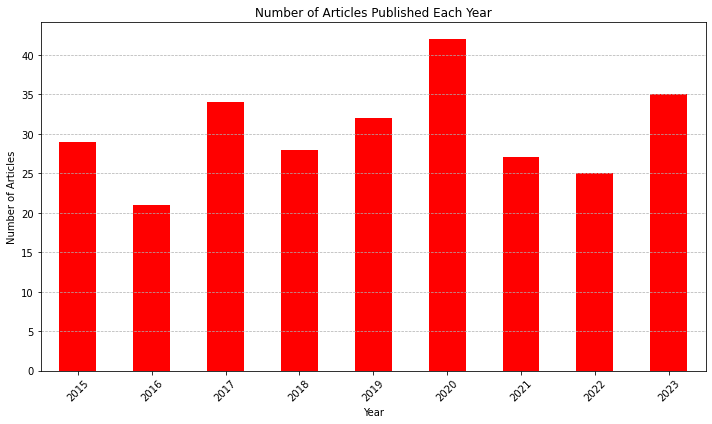

Publication_year
2015    29
2016    21
2017    34
2018    28
2019    32
2020    42
2021    27
2022    25
2023    35
dtype: int64

In [22]:
# Question 1: "How many articles are published each year, and is there a trend over time?"

import matplotlib.pyplot as plt

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='red')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Also, return the data for exact numbers
articles_per_year

In [23]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

J Vasc Surg Venous Lymphat Disord    20
J Vasc Interv Radiol                 12
Ann Vasc Surg                         9
Artif Organs                          8
Cureus                                8
ACS Appl Mater Interfaces             7
Vasc Med                              7
ASAIO J                               6
J Mater Chem B                        5
Am J Cardiol                          5
Name: Cleaned_Journal, dtype: int64

In [24]:
#Questions 3 Which affiliations or institutions have the highest number of publications?
import pandas as pd

# Concatenate all affiliation columns into a single Series
all_affiliations = pd.Series()
for i in range(1, max_affiliations_per_publication + 1):
    all_affiliations = all_affiliations.append(df[f'Affiliation_{i}'])

# Clean and standardize the affiliations, if necessary
# For example: trimming whitespace, converting to lowercase, etc.
# all_affiliations = all_affiliations.str.strip().str.lower()

# Count the frequency of each affiliation
affiliation_counts = all_affiliations.value_counts()

# Display the top affiliations
top_affiliations = affiliation_counts.head(10)  # You can adjust the number to display more or fewer top affiliations
top_affiliations


<ipython-input-24-ccdcfcb43f43>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  all_affiliations = pd.Series()


1 Department of Osteopathic Medical Specialties, College of Osteopathic Medicine, Michigan State University, East Lansing, Michigan. Electronic address: steinp@msu.edu                                                      5
2 Department of Osteopathic Medical Specialties, College of Osteopathic Medicine, Michigan State University, East Lansing, Michigan.                                                                                         4
2 Department of Biomedical Engineering, The Pennsylvania State University, University Park, PA, USA                                                                                                                          3
1 Faculty of Mechanical and Material Engineering, Huaiyin Institute of Technology, Huai'an 223003, China                                                                                                                     2
1 Division of Applied Mechanics, Office of Science and Engineering Laboratories, Center for Devices and Radi

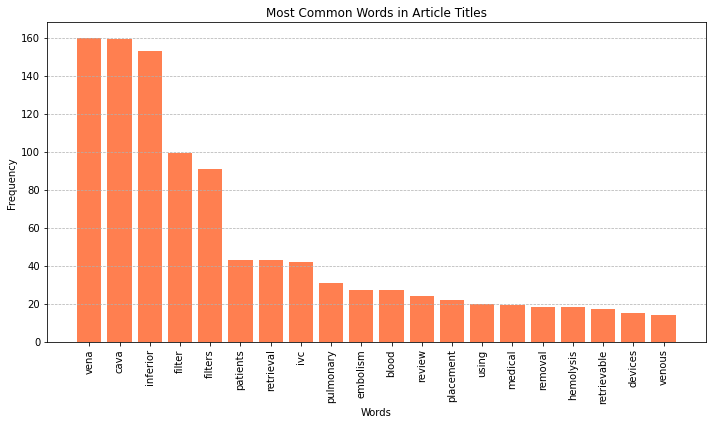

[('vena', 160),
 ('cava', 159),
 ('inferior', 153),
 ('filter', 99),
 ('filters', 91),
 ('patients', 43),
 ('retrieval', 43),
 ('ivc', 42),
 ('pulmonary', 31),
 ('embolism', 27),
 ('blood', 27),
 ('review', 24),
 ('placement', 22),
 ('using', 20),
 ('medical', 19),
 ('removal', 18),
 ('hemolysis', 18),
 ('retrievable', 17),
 ('devices', 15),
 ('venous', 14)]

In [25]:
# Questions 4: "What are the most common themes or keywords present in the article titles?"

from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and split into tokens
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# List of English stop words
stop_words = set([
    'the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'by', 'an', 'as', 'at',
    'from', 'is', 'that', 'its', 'it', 'this', 'these', 'are', 'was', 'were', 'which', 'or'
])

# Tokenize the titles and remove stop words
titles = df['Title']
tokens = [word for title in titles for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words), color='coral')
plt.title('Most Common Words in Article Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common words and their counts
most_common_words

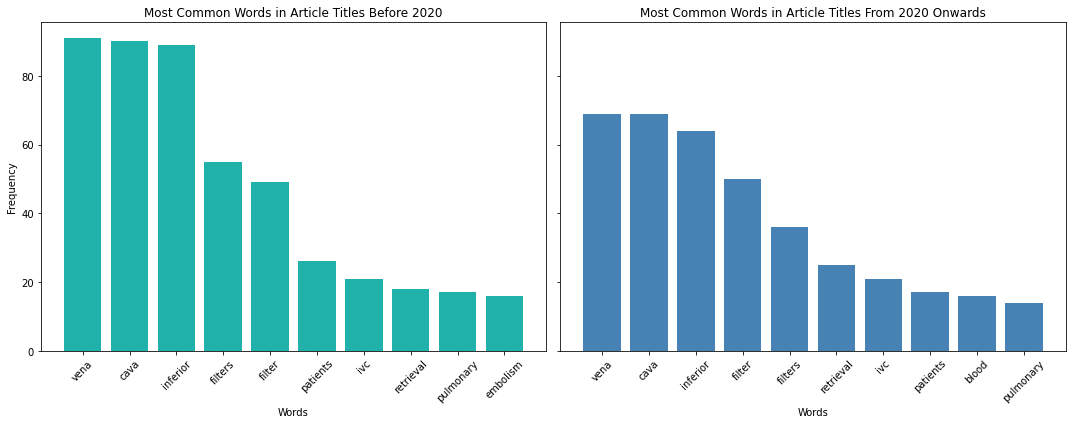

([('vena', 91),
  ('cava', 90),
  ('inferior', 89),
  ('filters', 55),
  ('filter', 49),
  ('patients', 26),
  ('ivc', 21),
  ('retrieval', 18),
  ('pulmonary', 17),
  ('embolism', 16)],
 [('vena', 69),
  ('cava', 69),
  ('inferior', 64),
  ('filter', 50),
  ('filters', 36),
  ('retrieval', 25),
  ('ivc', 21),
  ('patients', 17),
  ('blood', 16),
  ('pulmonary', 14)])

In [26]:
# Questions 5: "Are there emerging topics or trends in recent years?"


# perform the same analysis with the variable named 'df'
# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020_df = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards_df = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020_df = Counter(tokens_before_2020_df)
word_counts_from_2020_onwards_df = Counter(tokens_from_2020_onwards_df)

# Get the most common words for each period
most_common_words_before_2020_df = word_counts_before_2020_df.most_common(10)
most_common_words_from_2020_onwards_df = word_counts_from_2020_onwards_df.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020_df), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards_df), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
# axes[1].set_ylabel('Frequency')  # Y-axis is shared, so no need to set again
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020_df, most_common_words_from_2020_onwards_df)


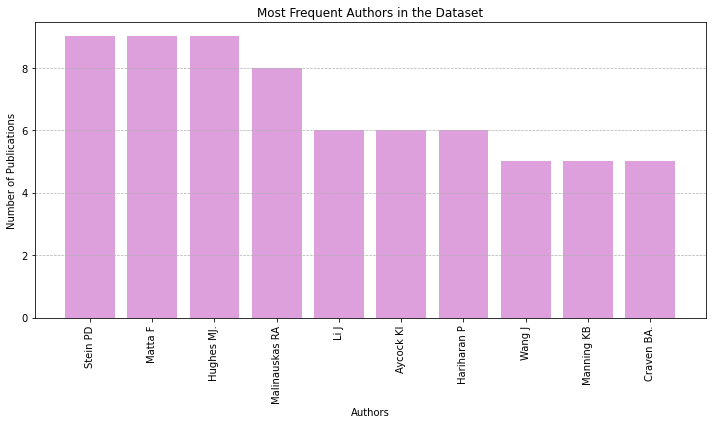

[('Stein PD', 9),
 ('Matta F', 9),
 ('Hughes MJ.', 9),
 ('Malinauskas RA', 8),
 ('Li J', 6),
 ('Aycock KI', 6),
 ('Hariharan P', 6),
 ('Wang J', 5),
 ('Manning KB', 5),
 ('Craven BA.', 5)]

In [27]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='plum')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

In [28]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations

[(('Matta F', 'Stein PD'), 9),
 (('Hughes MJ', 'Stein PD'), 9),
 (('Hughes MJ', 'Matta F'), 9),
 (('Craven BA', 'Manning KB'), 6),
 (('Aycock KI', 'Manning KB'), 5),
 (('Aycock KI', 'Craven BA'), 5),
 (('Hariharan P', 'Malinauskas RA'), 5),
 (('Stavropoulos SW', 'Trerotola SO'), 4),
 (('Herbertson LH', 'Malinauskas RA'), 4),
 (('Madoff DC', 'Trost D'), 3)]

<ipython-input-29-cee2c2dec8d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-29-cee2c2dec8d5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


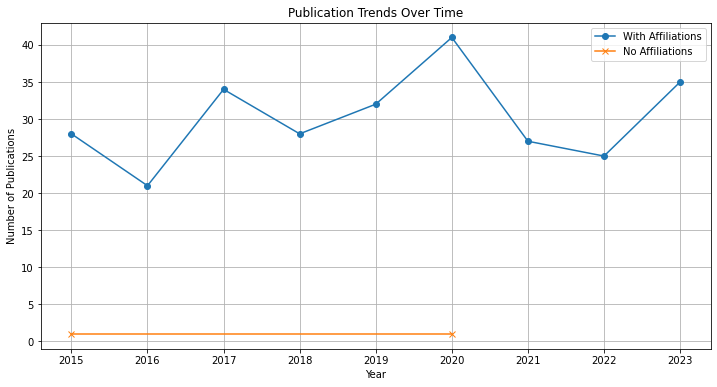

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a condition to check if all affiliation columns are empty or contain 'no affiliations found'
no_affiliations_condition = df['Affiliation_1'].str.lower().str.contains('no affiliations found')
for i in range(2, max_affiliations_per_publication + 1):
    no_affiliations_condition &= df[f'Affiliation_{i}'].str.lower().str.contains('no affiliations found', na=True)

# Separate the dataset into two subsets
df_with_affiliations = df[~no_affiliations_condition]
df_no_affiliations = df[no_affiliations_condition]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()